#Principal Component Analysis for analyzing the Iris dataset


Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of data by identifying patterns and correlations among the features. PCA achieves this by transforming the original features into a new set of uncorrelated features, called principal components, which capture the most significant variation in the data. The first principal component explains the most significant amount of variance, followed by the second principal component, and so on. PCA is widely used in various fields, such as data compression, image processing, bioinformatics, and machine learning, to simplify the data and facilitate its analysis, visualization, and interpretation.

This lab project involving the Iris dataset and PCA  involves using PCA to explore the relationships between the different measurements of iris flowers, which include sepal length, sepal width, petal length, and petal width. The Iris dataset is a classic example in machine learning and consists of 150 iris flower samples, each with its corresponding species label. The objective of the lab project could be to identify patterns in the data and see if we can separate the different species of iris flowers based on their measurements.

To perform the PCA analysis, we would first need to load the Iris dataset into our programming environment and standardize the features to ensure that they have the same scale. Next, we would compute the covariance matrix of the standardized data and then obtain the eigenvectors and eigenvalues of the covariance matrix. These eigenvectors represent the principal components, and the corresponding eigenvalues represent the amount of variance explained by each principal component.

We can then plot the data in the reduced dimensionality space spanned by the first two or three principal components to visualize the patterns in the data. By examining the loadings (correlations) of the original features with the principal components, we can also determine which features are most important in explaining the variation in the data.

Finally, we can use the reduced dimensionality space to visualize the separation between the different species of iris flowers and evaluate the effectiveness of the PCA approach in identifying patterns in the data. Overall, the lab project would provide students with a hands-on experience in applying PCA to real-world data and help them develop their skills in data analysis, visualization, and interpretation.

##Obtain Data

To obtain the Iris dataset for the lab project, students can either download it from a public repository or use a built-in function from popular machine learning libraries such as scikit-learn or TensorFlow. The dataset is widely available and has been used as a standard benchmark for machine learning algorithms. It is important to ensure that the dataset is properly credited and that any usage restrictions or licensing requirements are respected. Additionally, students should verify the integrity and quality of the dataset to ensure that it is suitable for their analysis.



In [2]:
#obtain iris dataset from sklearn
from sklearn import datasets
iris = datasets.load_iris()
#iris is a dictionary
print(iris.keys())
#iris.data is a numpy array
print(iris.data.shape)
#iris.target is a numpy array
print(iris.target.shape)
#iris.target_names is a numpy array
print(iris.target_names.shape)



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
(150,)
(3,)


In [3]:
#build a dataframe  with iris data
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# Data visualization

To visualize the Iris dataset in the lab project, students can use various plotting libraries such as Matplotlib or Seaborn. It is important to choose the appropriate type of plot depending on the nature of the data and the research question. For example, scatterplots can be used to visualize the relationship between two continuous variables, while box plots or violin plots can be used to compare the distribution of a variable across different categories. When using PCA to reduce the dimensionality of the data, students can plot the data points in the reduced dimensionality space spanned by the first two or three principal components to visualize the patterns in the data. It is also important to include appropriate labels, titles, and legends to ensure that the plots are informative and easy to interpret. Overall, visualization is an essential tool for exploratory data analysis and can help students gain insights into the structure and patterns of the data.

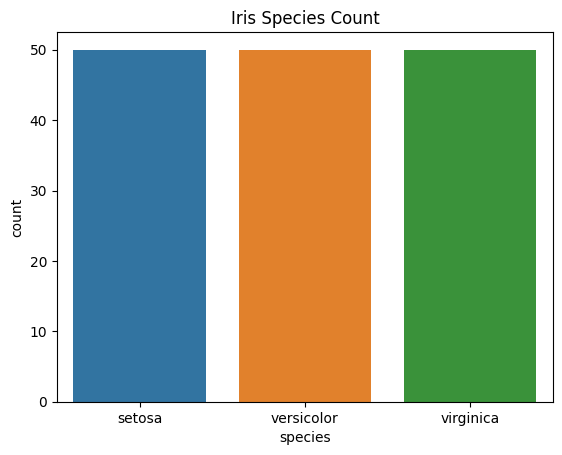

In [5]:
#import matplotlib
import matplotlib.pyplot as plt
# bar plot of species using seaborn
import seaborn as sns
sns.countplot(x='species', data=iris_df)
plt.title('Iris Species Count')
plt.show()


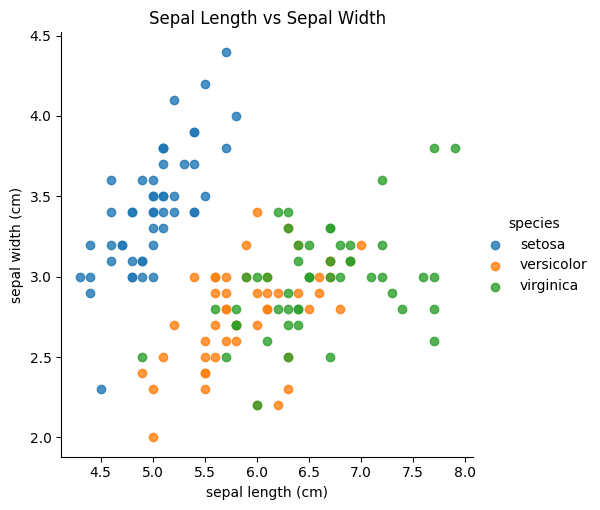

In [6]:
# scatter plot of sepal length vs sepal width
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='species', fit_reg=False)
plt.title('Sepal Length vs Sepal Width')
plt.show()


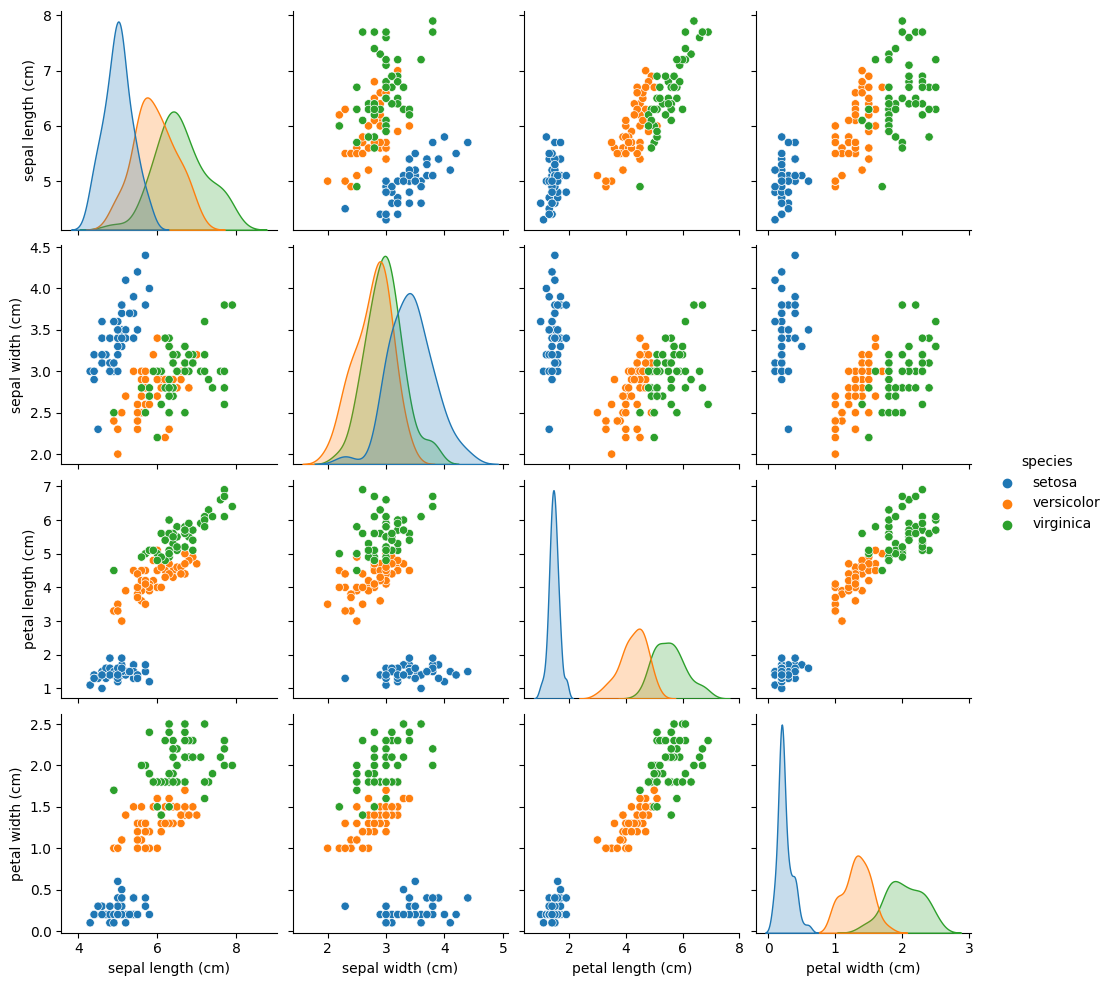

In [7]:
# scatter plot matrix
sns.pairplot(iris_df, hue='species')
plt.show()


## Scaling the data

Scaling the data is an essential preprocessing step when performing PCA or any other machine learning algorithm. Scaling ensures that all the features are on the same scale and prevents features with large values from dominating the analysis. Without scaling, features with large values would have a greater influence on the covariance matrix and the eigenvectors, leading to biased results. There are various scaling methods, including standardization and normalization, which can be applied depending on the nature of the data and the research question. Standardization scales the data to have zero mean and unit variance, while normalization scales the data to have a range between 0 and 1 or -1 and 1. The choice of scaling method depends on the distribution of the data and the assumptions of the analysis. In the case of PCA, standardization is the most commonly used scaling method since it ensures that the principal components capture the maximum variance in the data. It is important to apply scaling consistently across the training and testing data to ensure that the results are reliable and generalizable.

In [8]:
# scale the data
from sklearn.preprocessing import scale
scaled_X = scale(iris.data)
print(scaled_X[0:5, :])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


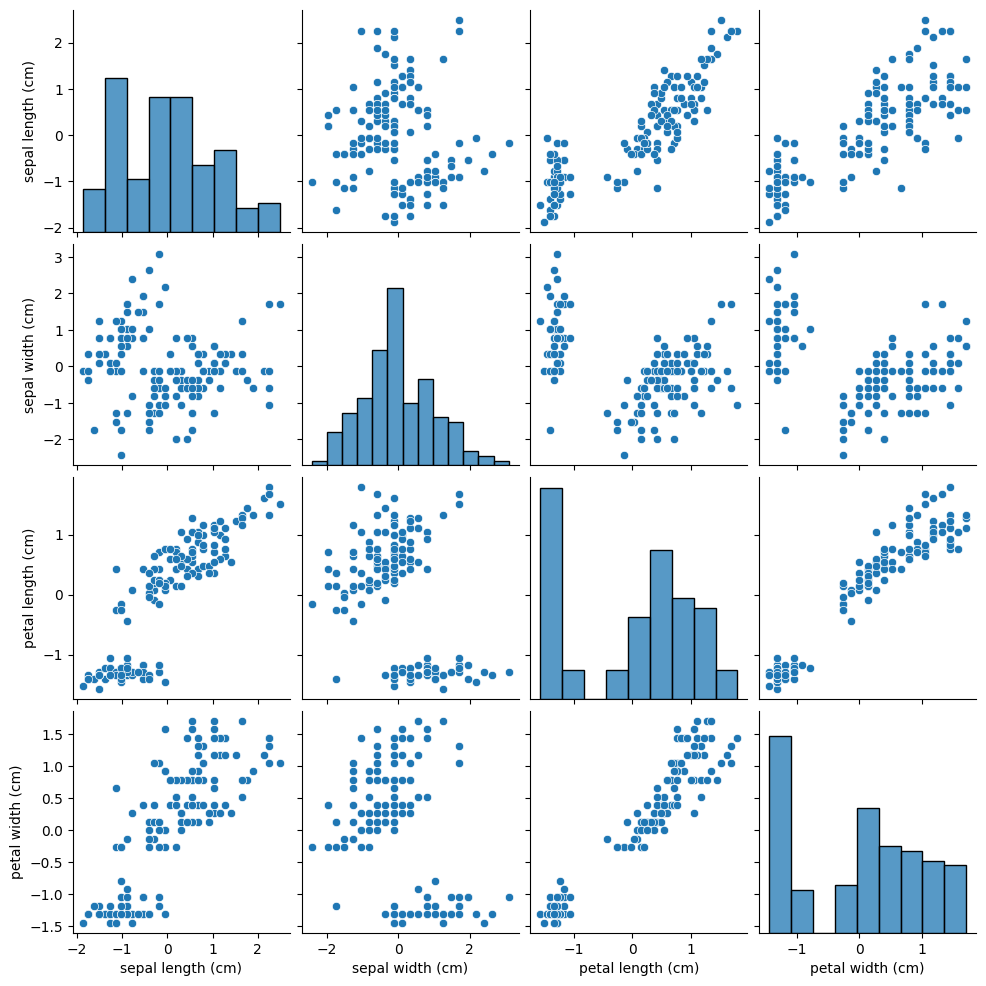

In [9]:
#plot the scaled data
sns.pairplot(pd.DataFrame(scaled_X, columns=iris.feature_names))
plt.show()


In [11]:
#build a dataframe with scaled data
scaled_df = pd.DataFrame(scaled_X, columns=iris.feature_names)
scaled_df['species'] = iris.target_names[iris.target]
print(scaled_df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


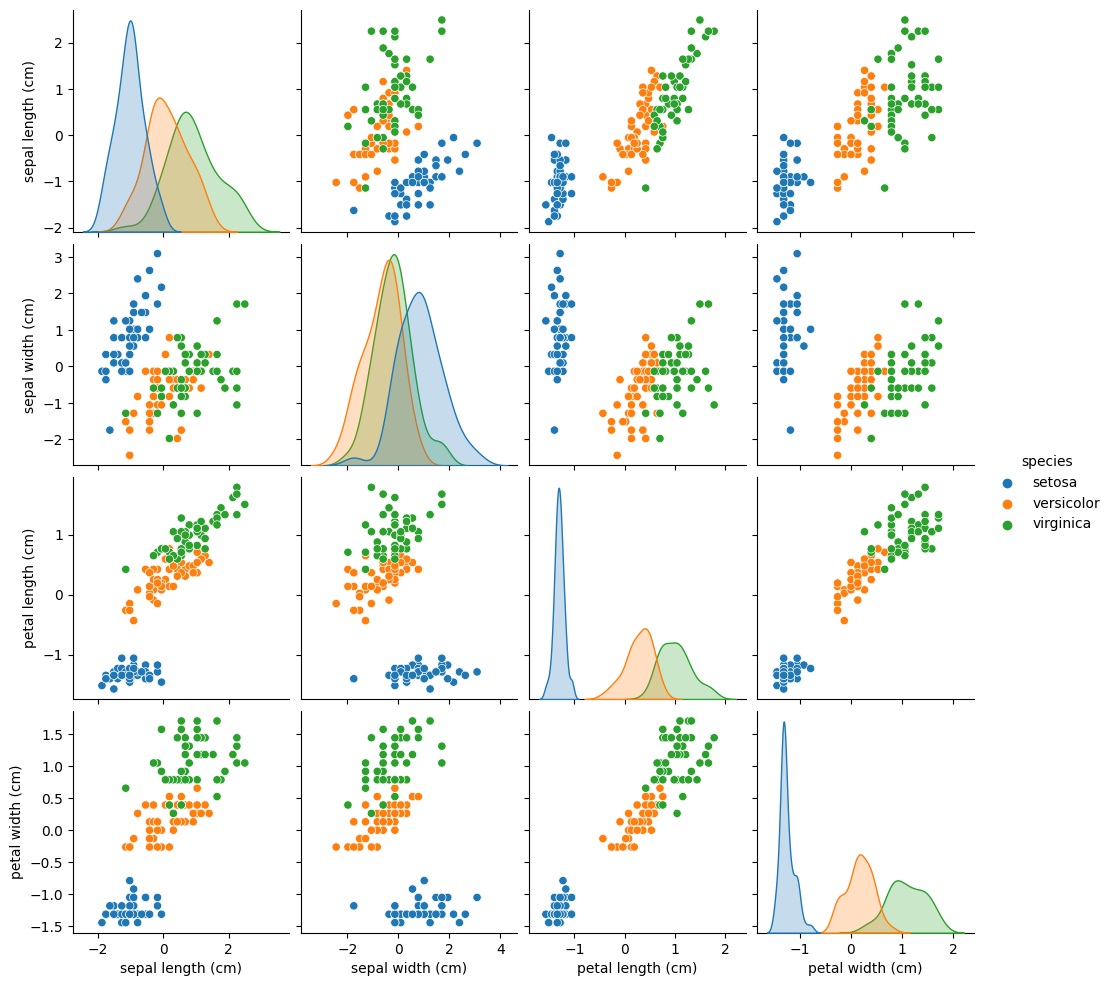

In [12]:
#plot the scaled data using scatter plot matrix
sns.pairplot(scaled_df, hue='species')
plt.show()


#PCA

The PCA process involves several steps to reduce the dimensionality of the data and identify the most significant patterns and correlations among the features. The steps are as follows:

Standardization: The first step is to standardize the data to ensure that all the features are on the same scale.

Covariance matrix computation: Next, we compute the covariance matrix of the standardized data to quantify the relationships between the features.

Eigenvector and eigenvalue computation: We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components, and the eigenvalues represent the amount of variance explained by each principal component.

Principal component selection: We select the top k principal components that explain the most variance in the data, where k is less than or equal to the original number of features.

Data transformation: We transform the original data into a new dataset using the selected principal components.
Visualization: We can then visualize the transformed data in the reduced dimensionality space to identify patterns and correlations in the data.



In [13]:
#build principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled_X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())


[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.95813207 0.99482129 1.        ]


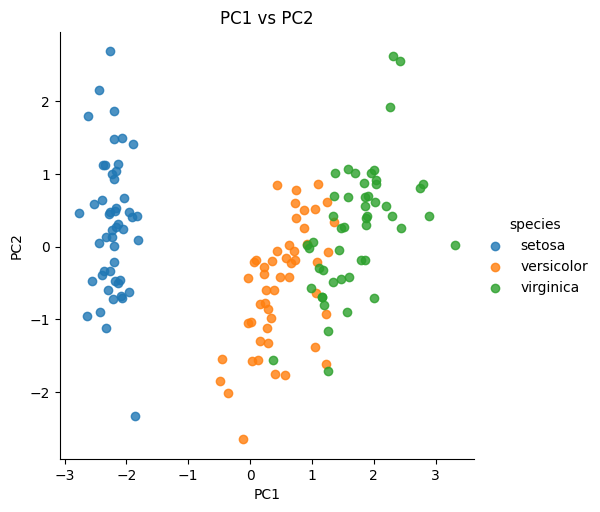

In [15]:
# plot a projection of the first two principal components
pca_df = pd.DataFrame(pca.transform(scaled_X), columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['species'] = iris.target_names[iris.target]
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='species', fit_reg=False)
plt.title('PC1 vs PC2')
plt.show()



#Conclusions

Overall, PCA is a powerful tool for dimensionality reduction and data exploration, and it can help identify important relationships and patterns in high-dimensional datasets. It is important to interpret the results of PCA carefully and to validate the findings with additional analysis or experiments.